## Principal Component Analysis

### import Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Load Dataset

In [120]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\Iris.csv")

In [121]:
df=df.drop(['Id'],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [222]:
X=df.iloc[:,:-1]
Z=df.iloc[:,-1]

#### PCA from scratch

### Step 1: Standardize the dataset.

## $xnew = \frac {\sum_{i=1}^{N}\left(  x_{i}-\bar{X} \right)} {(\sigma)} $

In [107]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

<h3> Step 2: Calculate the covariance matrix. </h3>

#### The covariance between two features is calculated as follows:

## <center> $cov(x,y) = \frac{1}{n}\sum_{i=1}^{N}\left(  x_{i}-\bar{x} \right)  \left( y_{i}-\bar{y} \right)$


In [209]:
print('Covariance matrix: \n',np.cov(X_std.T))


Covariance matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


### Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.

In [210]:
eig_vals, eig_vecs = np.linalg.eig(np.cov(X_std.T))
eig_vecs=np.asarray(eig_vecs)
print("eig_vals: \n",eig_vals)
print("eig_vecs: \n",eig_vecs)

eig_vals: 
 [2.93035378 0.92740362 0.14834223 0.02074601]
eig_vecs: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### Step 4: Sort eigenvalues and their corresponding eigenvectors.

In [211]:
list(eig_vals).sort(reverse=True)
eig_vals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [212]:
for i in range(4):
    list(eig_vecs[i])
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

<h3> Step 5: Pick k eigenvalues and form a matrix of eigenvectors.(K is number of dimensions in which we want to reduce our data)

In [213]:
a = np.zeros((4,2))
a
for i in range(4):
    a[i][0]=eig_vecs[i][0]
    a[i][1]=-eig_vecs[i][1]
a

array([[ 0.52237162,  0.37231836],
       [-0.26335492,  0.92555649],
       [ 0.58125401,  0.02109478],
       [ 0.56561105,  0.06541577]])

### Step 6: Transform the original matrix.

### Feature matrix * top k eigenvectors = Transformed Data


In [216]:
Y = X_std.dot(a)
Y=pd.DataFrame(Y)

In [217]:
new_df=pd.concat([Y,Z],axis=1)

<h3> Visualization after applying PCA 

Text(0.5, 1.0, 'PCA')

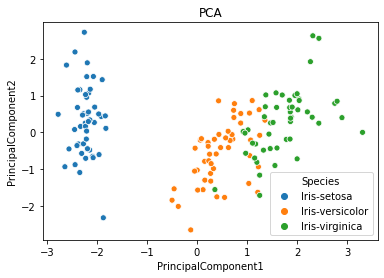

In [218]:
sns.scatterplot(data=new_df,x=df[0],y=df[1],hue="Species")
plt.xlabel("PrincipalComponent1")
plt.ylabel("PrincipalComponent2")
plt.title("PCA")

<h3> PCA using sklearn library

In [219]:
from sklearn.decomposition import PCA as sklearnPCA
sklrn_pca = sklearnPCA(n_components=2)
Y_sklrn = sklearn_pca.fit_transform(X_std)
Y_sklrn=pd.DataFrame(Y_sklrn)


In [220]:
df1=pd.concat([Y_sklrn,Z],axis=1)

Text(0.5, 1.0, 'PCA')

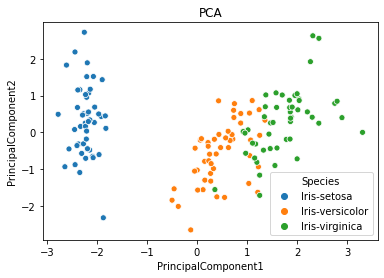

In [221]:
sns.scatterplot(data=df1,x=df1[0],y=df1[1],hue="Species")
plt.xlabel("PrincipalComponent1")
plt.ylabel("PrincipalComponent2")
plt.title("PCA")